In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("house.csv")

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [10]:
df_filled = df.fillna(df.mean())

C:\Users\utkal\AppData\Local\Temp\ipykernel_2488\387695082.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


In [11]:
df_filled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [25]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

In [33]:
df=df_encoded
df.dropna(inplace=True)

In [120]:
X = df[['housing_median_age', 'total_rooms', 'total_bedrooms','longitude','latitude','population','households','median_income']]
y=df['median_house_value']


In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr=LinearRegression()

In [112]:
lr.fit(X_train,y_train)

LinearRegression()

In [113]:
y_pred=lr.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error,r2_score

In [115]:
mse = mean_squared_error(y_test, y_pred)

In [116]:
print("Mean Squared Error:", mse)

Mean Squared Error: 4921881237.628142


In [117]:
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.640086568899374


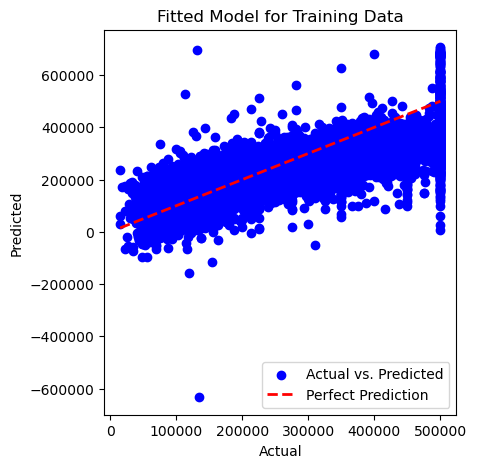

In [119]:
import matplotlib.pyplot as plt

# Predictions for training data
y_train_pred = lr.predict(X_train)

# Predictions for test data
y_test_pred = lr.predict(X_test)

# Plotting the fitted model for training data
plt.figure(figsize=(10, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Fitted Model for Training Data')
plt.legend()

# Test data
